# Projective distortion

(204, 341, 3)


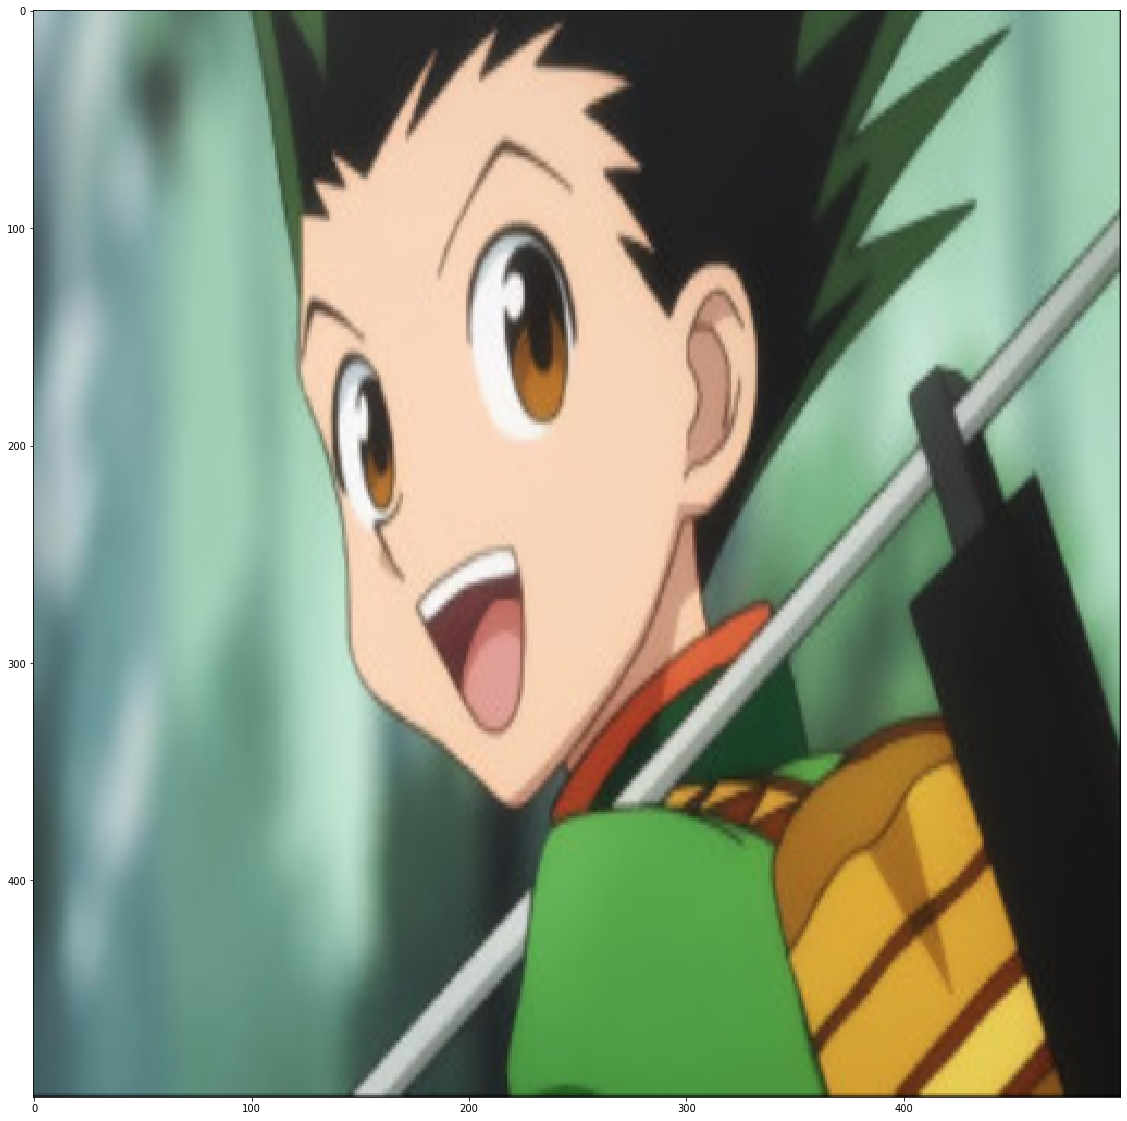

In [63]:
import cv2
import matplotlib.pyplot as plt
import numpy as np


bgr_target = cv2.imread('./pictures/publicitaire_banner.jpg')
rgb_target = cv2.cvtColor(bgr_target, cv2.COLOR_BGR2RGB)

bgr_gon = cv2.imread('./pictures/gon_landscape.jpg')
rgb_gon = cv2.cvtColor(bgr_gon, cv2.COLOR_BGR2RGB)

target_gon = np.zeros(shape=(500,500,3))

print(rgb_gon.shape)
srcCornerList= np.array([
    [0,0],
    [0,rgb_gon.shape[0]],
    [rgb_gon.shape[1],0],
    [rgb_gon.shape[1],rgb_gon.shape[0]]
],np.float32)
destCornerList= np.array([
    [0,0],
    [0,target_gon.shape[0]],
    [target_gon.shape[1],0],
    [target_gon.shape[1],target_gon.shape[0]]
],np.float32)


transform = cv2.getPerspectiveTransform(srcCornerList,destCornerList)
ret = cv2.warpPerspective(src=rgb_gon,dst=target_gon,M=transform,dsize = (target_gon.shape[1],target_gon.shape[0]))

fig = plt.figure(figsize=(20, 20))

plt.imshow(ret)


In [ ]:
cv2.getPerspectiveTransform()